## General ##
1. Write a program that gets a decimal number as its input and prints the same number in the binary, octal and hexadecimal bases.

In [1]:
# Converts a decimal number to a new numerical base.
# The numerical base is detected by the number of digits given.
def ConvertBaseFromDecimal(decimal, digits):
    # the numerical base dictates the number of digits:
    desired_base = len(digits)
    new_number = ""
    current_number = decimal
    i = 0
    while (current_number != 0):
        reminder = int(current_number % desired_base)
        current_number = (current_number - reminder) / desired_base
        new_number += digits[reminder]
    # Reverse the string to match reading order:
    return new_number[::-1]

In [2]:
decimal = int(input("Enter a decimal number: "))

binary_digits = ['0', '1']
binary = ConvertBaseFromDecimal(decimal, binary_digits)

octal_digits = ['0', '1', '2', '3', '4', '5', '6', '7']
octal = ConvertBaseFromDecimal(decimal, octal_digits)

hexadecimal_digits = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F']
hexadecimal = ConvertBaseFromDecimal(decimal, hexadecimal_digits)

print("Binary: " + binary + "\n" + "Octal: " + octal + "\n" + "Hexadecimal: 0x" + hexadecimal)

Binary: 1010
Octal: 12
Hexadecimal: 0xA


## Pandas ##
Loading Data Sets: 

In [3]:
import pandas as pd

movie_list = pd.read_csv("movie_list.csv")
movie_list.head()

,title,year
0,The Rising Son,1990
1,Ashes of Kukulcan,2016
2,The Thousand Plane Raid,1969
3,Crucea de piatra,1993
4,The 86,2015


In [4]:
cast = pd.read_csv("cast.csv")
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22.0
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27.0
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3.0
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


1. How many movies have the title "Hamlet"?

In [5]:
hamlet = movie_list[movie_list['title'] == "Hamlet"]
len(hamlet.index)

19

2. List all of the "Treasure Island" movies from earliest to most recent.

In [6]:
treasure_island = movie_list[movie_list['title'].str.lower().str.contains("treasure island")]
treasure_island.sort_values('year')

,title,year
191379,Treasure Island,1918
47769,Treasure Island,1920
192917,Treasure Island,1934
134298,The Secret of Treasure Island,1938
55661,Charlie Chan at Treasure Island,1939
90175,Treasure Island,1950
174084,Return to Treasure Island,1954
153356,Five on a Treasure Island,1957
104714,Treasure Island,1972
103646,Treasure Island,1973


3. How many roles were credited in the silent 1921 version of Hamlet?

In [7]:
hamlet_cast = cast[cast['title'].str.lower().str.contains("hamlet")]
hamlet_1921 = hamlet_cast[hamlet_cast['year'] == 1921]
len(hamlet_1921.index)

9

4. Use groupby() to plot the number of "Hamlet" films made each decade

<AxesSubplot:xlabel='year'>

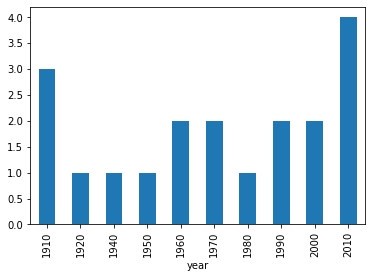

In [13]:
films_per_decade = hamlet.groupby(hamlet.year // 10 * 10).size()
films_per_decade.plot(kind='bar')

5. How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [9]:
leads = cast[cast['n'] == 1]
for year in range(1950, 1960):
    this_years_leads = leads[leads['year'] == year]
    n_actors = len( this_years_leads[this_years_leads['type'] == 'actor'].index )
    n_actresses = len( this_years_leads[this_years_leads['type'] == 'actress'].index )
    print("In the year {} there were {} leading actors and {} leading actresses.".format(year, n_actors, n_actresses))

In the year 1950 there were 604 leading actors and 271 leading actresses.
In the year 1951 there were 633 leading actors and 272 leading actresses.
In the year 1952 there were 591 leading actors and 284 leading actresses.
In the year 1953 there were 634 leading actors and 290 leading actresses.
In the year 1954 there were 626 leading actors and 298 leading actresses.
In the year 1955 there were 606 leading actors and 264 leading actresses.
In the year 1956 there were 614 leading actors and 288 leading actresses.
In the year 1957 there were 708 leading actors and 284 leading actresses.
In the year 1958 there were 694 leading actors and 275 leading actresses.
In the year 1959 there were 678 leading actors and 287 leading actresses.


6. List the 10 actors/actresses that have the most leading roles (n=1) since the 1990's.

In [10]:
leads_since_1990s = cast[ (cast['year'] >= 1990) & (cast['n'] == 1) ]
leads_since_1990s['name'].value_counts()[:10].index.tolist()

['Mohanlal',
 'Mammootty',
 'Akshay Kumar',
 'Jayaram',
 'Andy Lau',
 'Ajay Devgn',
 'Eric Roberts',
 'Amitabh Bachchan',
 'Nagarjuna Akkineni',
 'Dilip']

7. List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [11]:
frank = cast[cast['name'] == 'Frank Oz']
frank.sort_values('year')
frank = frank.groupby(['year','title']).size()
frank[frank > 1]

year  title                                   
1979  The Muppet Movie                            8
1981  An American Werewolf in London              2
      The Great Muppet Caper                      6
1982  The Dark Crystal                            2
1984  The Muppets Take Manhattan                  7
1985  Sesame Street Presents: Follow that Bird    3
1992  The Muppet Christmas Carol                  7
1996  Muppet Treasure Island                      4
1999  Muppets from Space                          4
      The Adventures of Elmo in Grouchland        3
dtype: int64